# Synteza 

# Załadowanie danych

In [22]:
%config InlineBackend.figure_format = 'svg'

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
from joblib import dump, load
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

# load data
x, y = load_wine(return_X_y=True, as_frame=True)
wine = load_wine()

# Normalizacja i podział danych, uczenie, raport, confusion_matrix

In [23]:
# normalize values to same range (0, 1)
scaler = MinMaxScaler() 
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled)

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

# sort values
x_test['y'] = y_test
x_test = x_test.sort_values(by=['y'])
y_test = x_test['y']
x_test = x_test.drop(columns=['y'])

# create classifier and learn it
try:
  eclf = load('model_123.joblib')
except:
  clf1 = SVC()
  clf2 = KNeighborsClassifier()
  clf3 = MLPClassifier(max_iter=2000)

  eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], n_jobs=-1)
  eclf = eclf.fit(x_train, y_train)
  dump(eclf, 'model_123.joblib')

# predict
y_predicted = eclf.predict(x_test)

print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        28

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107

[[35  1  0]
 [ 0 43  0]
 [ 0  0 28]]


# Ładniejszy confusion_matrix

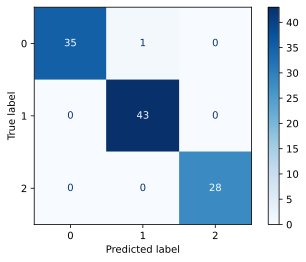

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(eclf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

Wykres pomyłek

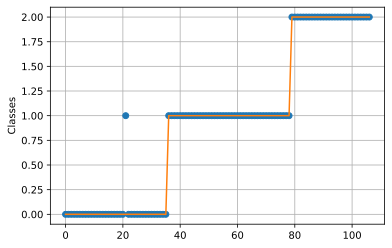

In [25]:
plt.plot(range(y_predicted.size), y_predicted, 'o')
plt.plot(range(y_test.size), y_test)

plt.xlabel("")
plt.ylabel("Classes")
plt.title("")
plt.grid()

plt.show()

# Krzywa uczenia

<module 'matplotlib.pyplot' from '/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

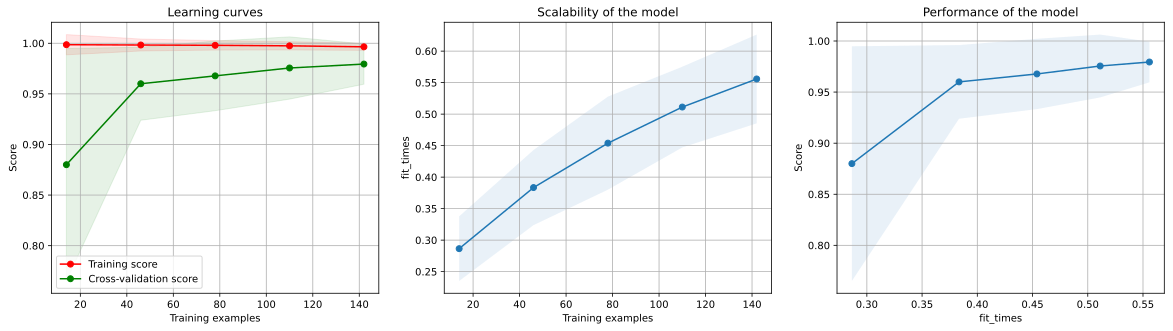

In [26]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)


plot_learning_curve(eclf, 'Learning curves', x, y, cv=cv, n_jobs=4)